Find the dimensions (height h and radius r) that will minimize the surface area of the metal to
manufacture a circular cylindrical can of volume V .

S = 2*pi*r*h + 2*pi*r**2
V = pi*r**2 *h

h = V/pi*r**2

S(r) = 2*V/r + 2*pi*r**2
S'(r) = -2*V/r**2 + 4*pi*r

S'(r) = 0 : r=(V/(2*pi))**(1/3)

0.5419260701392891


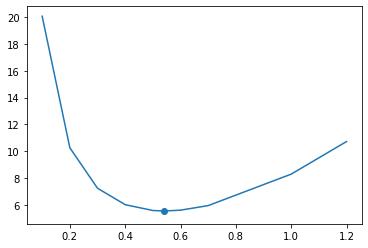

In [9]:
from math import pi
def calc_S(r): #V === 1
    return 2/r+2*pi*r**2
ropt = (1/(2*pi))**(1/3)
print(ropt)
r_vals = [0.1, 0.2, 0.3, 0.4, 0.5, ropt, 0.6, 0.7, 1, 1.2]
S_vals = [calc_S(r) for r in r_vals]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r_vals, S_vals)
plt.scatter(ropt, calc_S(ropt))

# Task 2
Consider the unconstrained optimization problem to minimize the function

b does not matter (adding constant does not affect function 
Condition of extremum: \nabla f = 0




In [ ]:
def fx1x2(x1, x2, a=1, b=1):
    return 3/2*(x1**2+x2**2) + (1+a)*x1*x2 - (x1+x2) + b



# Task 3
Nelder Mead method

In [52]:
from math import sin, cos, e
def func(x,y):
    return sin(y)*e**((1-cos(x))**2) + cos(x)*e**((1-sin(y))**2) + (x-y)**2
def in_area(x,y):
    return (x+5)**2 + (y+5)**2 < 25

al = 1
bet = 0.5
gam = 2

x0 = [
    [0,4],
    [4,0],
    [0,0]
]

def _get_center(x1, x2):
    xc = []
    for i in range(len(x1)):
        xc.append((x1[i]+x2[i])/2)
    return xc
def _reflect(xc, xh):
    xr = []
    for i in range(len(xc)):
        xr.append(xc[i]+al*(xc[i]-xh[i]))
    return xr
def _expansion(xc, xr):
    xe = []
    for i in range(len(xc)):
        xe.append(xc[i]+gam*(xr[i]-xc[i]))
    return xe
def _contraction(xc, xh):
    xco = []
    for i in range(len(xc)):
        xco.append(xc[i]+bet*(xh[i]-xc[i]))
    return xco
    

def step_nelder_mead(x):
    x_prev = x[:]
    f_prev = []
    for p in x_prev:
        f_prev.append(func(*p))
    x_best = x_prev.pop(np.argmin(f_prev))
    f_best = f_prev.pop(np.argmin(f_prev))
    x_worst = x_prev.pop(np.argmax(f_prev))
    f_worst = f_prev.pop(np.argmax(f_prev))
    x_mid = x_prev.pop()
    f_mid = f_prev.pop()
    x_c = _get_center(x_best, x_mid)
    x_r = _reflect(x_c, x_worst)
    f_r = func(*x_r)
    # 4. Comparison
    if f_r <= f_best:
        x_e = _expansion(x_c, x_r)
        f_e = func(*x_e)
        if f_e <= f_best:
            return [x_best, x_mid, x_e]
        elif f_e >= f_best:
            return [x_best, x_mid, x_r]
    elif f_best <= f_r and f_r <= f_mid:
        return [x_best, x_mid, x_r]
    elif f_worst >= f_r and f_r >= f_mid:
        #5. Contraction
        x_s = _contraction(x_c, x_worst)
        f_s = func(*x_s)
        if f_s <= f_worst: #6
            return [x_best, x_mid, x_s]
        elif f_s >= f_worst: #7. Shrinkage
            return [x_best, _contraction(x_best, x_worst), _contraction(x_best, x_mid)]
    print('ERROR, ', f_r, f_best, f_mid, f_worst)
    return None



In [53]:
steps = [x0]
for i in range(2):
    steps.append(step_nelder_mead(steps[i]))
    
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_steps(steps):
    for st in steps:
        xs, ys = [], []
        for s in st:
            xs.append(s[0])
            ys.append(s[1])
        plt.scatter(xs, ys)
        xs.append(xs[0])
        ys.append(ys[0])
        plt.plot(xs, ys)
    print("Done!")

visualize_steps(steps)

ERROR,  74.96326705432672 2.718281828459045 14.22321242311827 37.14031501268624


TypeError: 'NoneType' object is not subscriptable

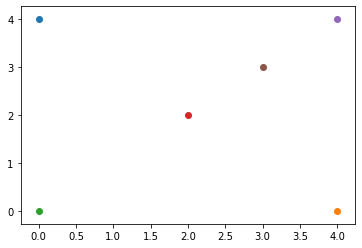

In [32]:

x0 = [
    [0,4],
    [4,0],
    [0,0]
]
x_best, x_mid, x_worst = x0[0], x0[1], x0[2]
for x in x0:
    plt.scatter(*x)
x_c = _get_center(x_best, x_mid)
plt.scatter(*x_c)
x_r = _reflect(x_c, x_worst)
plt.scatter(*x_r)
plt.scatter(*_expansion(x_c, x_r))

In [40]:
import math
math.e

2.718281828459045